<a href="https://colab.research.google.com/github/shubham10693/Admission-Predictor/blob/master/Toxic_comment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords          
from google.colab import files
from nltk.stem import WordNetLemmatizer   
from nltk.corpus import stopwords        

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [7]:
uploaded = files.upload()

Saving train.csv to train (1).csv


In [38]:
train1 = pd.read_csv('train (1).csv')
#test = pd.read_csv('test.csv')

In [39]:
train1.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [11]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
train1.shape

(159571, 8)

In [12]:
test.info()

NameError: ignored

In [ ]:
test.shape

(153164, 2)

In [ ]:
df = train.copy()
df.shape

(159571, 8)

In [40]:
length = train1['comment_text'].str.len()

print("Max length of a string is {}".format(length.max()))
print("Mean length of a string is {}".format(length.mean()))
print("Minimum length of a string is {}".format(length.min()))

Max length of a string is 5000
Mean length of a string is 394.0732213246768
Minimum length of a string is 6


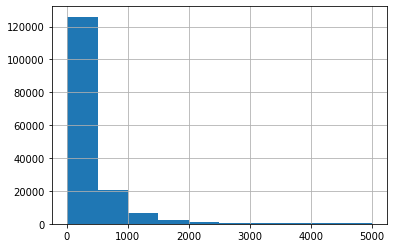

In [ ]:
length.hist()

In [ ]:
#Check for any null comments in the dataset
train1.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

**Data Preprocessing**


In [41]:
train1['comment_text'] = train1['comment_text'].apply(lambda x:x.lower())

In [42]:
train1['comment_text'].head(10)

0    explanation\nwhy the edits made under my usern...
1    d'aww! he matches this background colour i'm s...
2    hey man, i'm really not trying to edit war. it...
3    "\nmore\ni can't make any real suggestions on ...
4    you, sir, are my hero. any chance you remember...
5    "\n\ncongratulations from me as well, use the ...
6         cocksucker before you piss around on my work
7    your vandalism to the matt shirvington article...
8    sorry if the word 'nonsense' was offensive to ...
9    alignment on this subject and which are contra...
Name: comment_text, dtype: object

In [43]:
#Remove HTML tags
def html_tags(input_str):
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    clean = re.sub(html,'', str(input_str))
    return clean

In [44]:
train1['comment_text'] = train1['comment_text'].apply(lambda x:html_tags(x))

In [45]:
train1['comment_text'].head(10)

0    explanation\nwhy the edits made under my usern...
1    d'aww! he matches this background colour i'm s...
2    hey man, i'm really not trying to edit war. it...
3    "\nmore\ni can't make any real suggestions on ...
4    you, sir, are my hero. any chance you remember...
5    "\n\ncongratulations from me as well, use the ...
6         cocksucker before you piss around on my work
7    your vandalism to the matt shirvington article...
8    sorry if the word 'nonsense' was offensive to ...
9    alignment on this subject and which are contra...
Name: comment_text, dtype: object

In [46]:
#Remove Punctuation tags
def punct_tags(input_str):
    return re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^_`{|}~-]+', "", str(input_str))

In [47]:
train1['comment_text'] = train1['comment_text'].apply(lambda x:punct_tags(x))

In [48]:
train1['comment_text'].head(10)

0    explanation\nwhy the edits made under my usern...
1    daww he matches this background colour im seem...
2    hey man im really not trying to edit war its j...
3    \nmore\ni cant make any real suggestions on im...
4    you sir are my hero any chance you remember wh...
5    \n\ncongratulations from me as well use the to...
6         cocksucker before you piss around on my work
7    your vandalism to the matt shirvington article...
8    sorry if the word nonsense was offensive to yo...
9    alignment on this subject and which are contra...
Name: comment_text, dtype: object

In [49]:
#Remove \n
def remove_space(input_str):
    return re.sub(r'\n','',str(input_str))

In [50]:
train1['comment_text'] = train1['comment_text'].apply(lambda x:remove_space(x))

In [51]:
train1['comment_text'].head(10)

0    explanationwhy the edits made under my usernam...
1    daww he matches this background colour im seem...
2    hey man im really not trying to edit war its j...
3    morei cant make any real suggestions on improv...
4    you sir are my hero any chance you remember wh...
5    congratulations from me as well use the tools ...
6         cocksucker before you piss around on my work
7    your vandalism to the matt shirvington article...
8    sorry if the word nonsense was offensive to yo...
9    alignment on this subject and which are contra...
Name: comment_text, dtype: object

In [52]:
def lower(input_str):
    return input_str.lower() 

In [53]:
train1['comment_text'] = train1['comment_text'].apply(lambda x:x.strip())


In [29]:

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Tokenization

In [ ]:
'''from nltk.tokenize import word_tokenize
train['comment_text'] = train['comment_text'].apply(word_tokenize)
train['comment_text'].head(10)'''

0    [ExplanationWhy, the, edits, made, under, my, ...
1    [Daww, He, matches, this, background, colour, ...
2    [Hey, man, Im, really, not, trying, to, edit, ...
3    [MoreI, cant, make, any, real, suggestions, on...
4    [You, sir, are, my, hero, Any, chance, you, re...
5    [Congratulations, from, me, as, well, use, the...
6    [COCKSUCKER, BEFORE, YOU, PISS, AROUND, ON, MY...
7    [Your, vandalism, to, the, Matt, Shirvington, ...
8    [Sorry, if, the, word, nonsense, was, offensiv...
9    [alignment, on, this, subject, and, which, are...
Name: comment_text, dtype: object

In [30]:
train['comment_text'].head(10)

0    explanationwhy the edits made under my usernam...
1    daww he matches this background colour im seem...
2    hey man im really not trying to edit war its j...
3    morei cant make any real suggestions on improv...
4    you sir are my hero any chance you remember wh...
5    congratulations from me as well use the tools ...
6         cocksucker before you piss around on my work
7    your vandalism to the matt shirvington article...
8    sorry if the word nonsense was offensive to yo...
9    alignment on this subject and which are contra...
Name: comment_text, dtype: object

In [33]:
'''nltk.download('stopwords')
stop = set(stopwords.words('english'))
print(stop)'''

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{'while', 'he', 'but', "shan't", "aren't", 'me', 'himself', 'ma', 'it', 'for', 'both', "should've", 'into', "didn't", 'them', 'over', "you've", 'by', "isn't", "wouldn't", 'very', 'further', "it's", 'other', 'hadn', 'his', 'yours', "weren't", 'above', 'had', 'is', 'until', 'just', 'needn', "won't", 'this', 'am', 'weren', "wasn't", 'shan', 'don', 'in', 'or', 'a', 'aren', 'shouldn', 'isn', 'haven', 'that', 'itself', 'from', 'couldn', 'did', 'some', 'up', 'are', 'why', 'been', 're', "haven't", 's', 'has', 'wasn', 'ain', "mustn't", 'these', 'yourself', 'those', 'below', 've', 'if', 't', 'such', 'mustn', 'an', 'm', 'we', 'our', 'and', "that'll", 'between', 'own', "she's", 'didn', "you're", 'its', 'of', 'before', "you'd", 'down', 'off', 'through', 'ours', 'him', 'how', "mightn't", 'ourselves', 'was', 'have', 'd', "hadn't", 'out', 'most', 'theirs', 'on', 'because', 'each', 'themselves

In [56]:
#train['comment_text'] = train['comment_text'].apply(lambda x: [word for word in x if word not in stop])  
df =  train1.copy()
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanationwhy the edits made under my usernam...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really not trying to edit war its j...,0,0,0,0,0,0
3,0001b41b1c6bb37e,morei cant make any real suggestions on improv...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0


In [57]:
from nltk.stem import LancasterStemmer

def lancaster_stemmer(text):
    stemmer = nltk.LancasterStemmer()
    stems = [stemmer.stem(i) for i in text]
    return stems

In [ ]:
df['comment_text'] = df['comment_text'].apply(lambda x: lancaster_stemmer(x))
df.head()

In [ ]:
#Lemmatization
def lemma(text):
    lemmatizer = WordNetLemmatizer()
    lemma = [lemmatizer.lemmatize(word, tag) for word, tag in text]
    return lemma

In [ ]:
nltk.download('wordnet')
train['comment_text']= train['comment_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
train['comment_text'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [explanationwhy, the, edit, mad, und, my, user...
1    [daww, he, match, thi, background, colo, im, s...
2    [hey, man, im, real, not, try, to, edit, war, ...
3    [mor, cant, mak, any, real, suggest, on, impro...
4    [you, sir, ar, my, hero, any, chant, you, reme...
Name: comment_text, dtype: object

Model

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [ ]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"[ExplanationWhy, the, edits, made, under, my, ...",0,0,0,0,0,0
1,000103f0d9cfb60f,"[Daww, He, matches, this, background, colour, ...",0,0,0,0,0,0
2,000113f07ec002fd,"[Hey, man, Im, really, not, trying, to, edit, ...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"[MoreI, cant, make, any, real, suggestions, on...",0,0,0,0,0,0
4,0001d958c54c6e35,"[You, sir, are, my, hero, Any, chance, you, re...",0,0,0,0,0,0


In [ ]:
x = train['comment_text']
x.head()

0    [explanationwhy, the, edit, mad, und, my, user...
1    [daww, he, match, thi, background, colo, im, s...
2    [hey, man, im, real, not, try, to, edit, war, ...
3    [mor, cant, mak, any, real, suggest, on, impro...
4    [you, sir, ar, my, hero, any, chant, you, reme...
Name: comment_text, dtype: object

In [ ]:
y = train.iloc[:, 2:8]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [ ]:
print("The shape of {} is {} :".format('X_train', X_train.shape))
print("The shape of {} is {} :".format('y_train', y_train.shape))
print("The shape of {} is {} :".format('X_test', X_test.shape))
print("The shape of {} is {} :".format('y_test', y_test.shape))

The shape of X_train is (111699,) :
The shape of y_train is (111699, 6) :
The shape of X_test is (47872,) :
The shape of y_test is (47872, 6) :


In [ ]:
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=word_tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1 )

In [ ]:
#X_train_fit = vec.fit_transform(X_train.ravel().tolist())  
X_test_fit = vec.transform(X_test.ravel().tolist()) 

NotFittedError: ignored

In [ ]:
# Instantiate the vectorizer
word_vectorizer = TfidfVectorizer(
    stop_words='english',
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{2,}',  #vectorize 2-character words or more
    ngram_range=(1, 1),
    max_features=30000)

# fit and transform on it the training features
#word_vectorizer.fit(X_train)
#X_train_word_features = word_vectorizer.transform(X_train)

#transform the test features to sparse matrix
test_features = word_vectorizer.transform(X_test)

NotFittedError: ignored

In [ ]:
X_train.head(10)

54568     [conflict, of, interest, noteby, yo, u, nam, i...
3786             [upd, act, i, chang, thi, to, some, bland]
22938     [mrca, art, sniperz11, thank, for, yo, com, on...
137856    [argu, that, bart, and, caltrain, should, get,...
143038    [block, hi, i, block, you, for, 24, hour, for,...
101451    [shel, a, next, thing, we, know, yo, be, tak, ...
58349     [georg, kinkladz, i, took, the, art, to, fac, ...
63154     [that, is, appropry, talk, you, fuck, dipshit,...
83999     [the, is, ind, no, such, conflict, a, david, i...
156706    [not, a, long, a, the, sourc, mat, her, is, no...
Name: comment_text, dtype: object

In [ ]:
X_train.ravel().tolist()

[['conflict',
  'of',
  'interest',
  'noteby',
  'yo',
  'u',
  'nam',
  'it',
  'appear',
  'that',
  'you',
  'repr',
  'a',
  'company',
  'or',
  'org',
  'plea',
  'read',
  'our',
  'conflict',
  'of',
  'interest',
  'guidelin',
  'a',
  'wel',
  'a',
  'our',
  'faq',
  'for',
  'busy',
  'we',
  'welcom',
  'yo',
  'contribut',
  'her',
  'but',
  'plea',
  'refrain',
  'from',
  'writ',
  'about',
  'yo',
  'own',
  'company',
  'serv',
  'and',
  'personnel',
  'thank',
  'and',
  'happy',
  'edit',
  'speak'],
 ['upd', 'act', 'i', 'chang', 'thi', 'to', 'some', 'bland'],
 ['mrca',
  'art',
  'sniperz11',
  'thank',
  'for',
  'yo',
  'com',
  'on',
  'my',
  'edit',
  'i',
  'ad',
  'som',
  'part',
  'about',
  'mirage2000',
  'being',
  'the',
  'origin',
  'mrca',
  'in',
  'the',
  'ind',
  'air',
  'forc',
  'art',
  'but',
  'frank',
  'speak',
  'i',
  'think',
  'that',
  'ther',
  'is',
  'no',
  'nee',
  'at',
  'al',
  'for',
  'a',
  'sep',
  'mrca',
  'art',
  